### 2022年度プログラミング演習A・B

# 第15回レポート課題の解説

### 演習1

次の $11$ 個の点に対して、正規方程式を解いて最小二乗法による線形回帰を行い、それらの点および求めた回帰直線（範囲は $0\leq x\leq 1$）を描画してください。

$$
(0,1.09),\quad (0.1,1.17),\quad (0.2,1.42),\quad (0.3,1.54),
$$

$$
(0.4,1.71),\quad (0.5,1.99),\quad (0.6,2.26),\quad (0.7,2.44),
$$

$$
(0.8,2.55),\quad (0.9,2.84),\quad (1,3.04)
$$

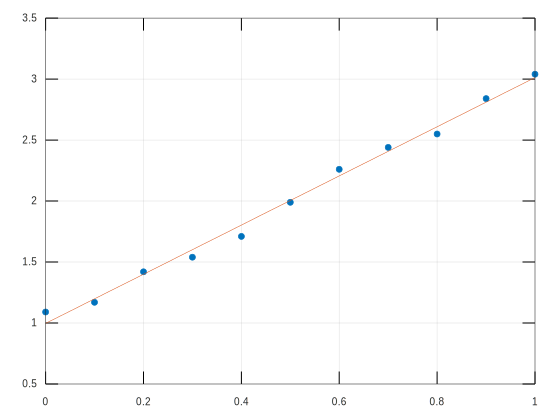

In [1]:
%plot --format svg

data = [0,1.09; 0.1,1.17; 0.2,1.42; 0.3,1.54; 0.4,1.71; 0.5,1.99; 0.6,2.26; 0.7,2.44; 0.8,2.55; 0.9,2.84; 1,3.04];  %点を並べた行列
n = size(data,1);  %点の個数

plot(data(:,1),data(:,2),".")  %点の描画
grid on
hold on

A = [ones(n,1),data(:,1)];
b = data(:,2);
c = (A'*A)\(A'*b);  %正規方程式を解く
%実は「c = A\b」でもよい（https://jp.mathworks.com/help/matlab/math/systems-of-linear-equations.htmlを参照）

x = 0:0.01:1;
y = c(1)+c(2)*x;
plot(x,y)  %回帰直線の描画

### 演習2

演習1と同じ $11$ 個の点に対して、統計量を用いた計算で最小二乗法による線形回帰を行い、それらの点および求めた回帰直線（範囲は $0\leq x\leq 1$）を描画してください。

ただし、統計量の計算には平均は`mean(ベクトル)`、分散は`var(ベクトル)`、共分散は`cov(ベクトル1,ベクトル2)`を使用してよいです。

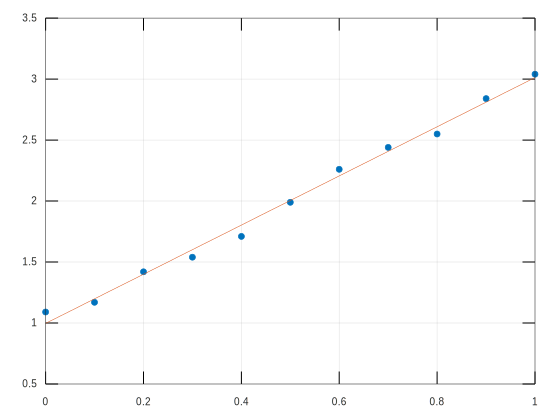

In [2]:
%plot --format svg

data = [0,1.09; 0.1,1.17; 0.2,1.42; 0.3,1.54; 0.4,1.71; 0.5,1.99; 0.6,2.26; 0.7,2.44; 0.8,2.55; 0.9,2.84; 1,3.04];  %点を並べた行列

plot(data(:,1),data(:,2),".")  %点の描画
grid on
hold on

c2 = cov(data(:,1),data(:,2))/var(data(:,1));  %統計量を用いた計算
c1 = mean(data(:,2))-c2*mean(data(:,1));

x = 0:0.01:1;
y = c1+c2*x;
plot(x,y)  %回帰直線の描画

### 演習3（オプション）

節点

$$
x_i=-1+\frac{2(i-1)}{n-1}\quad (i=1,\ldots,n)
$$

を用いて関数

$$
f(x)=\frac{1}{1+25x^2}
$$

を $m-1$ 次以下の多項式

$$
g(x)=\sum_{j=1}^m c_j x^{j-1}
$$

で近似することを考えます。

$n=30,60$、$m=10,20$ を組み合わせた計 $4$ 個の場合について近似多項式を求め、元の関数 $f(x)$ とともに $-1\leq x\leq 1$ の範囲でグラフを描画してください。

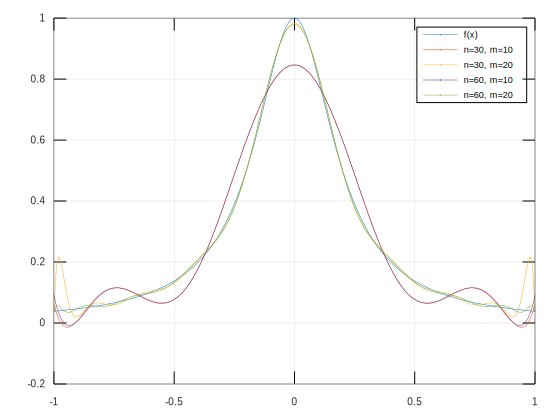

In [3]:
%plot --format svg

function value = f(x)  %関数f(x)
    value = 1./(1+25*x.^2);
end

x = -1:0.01:1;  %x座標の配列
y = f(x);
plot(x,y,"DisplayName","f(x)")  %f(x)のグラフを描画
grid on
hold on

%2つのfor文でnとmの値を変化させる
for n = [30,60]
    node = (-1:2/(n-1):1)';  %節点の配列（縦ベクトル）
    for m = [10,20]
        A = zeros(n,m);
        for j = 1:m
            A(:,j) = node.^(j-1);  %行列Aの各列を計算
        end
        b = f(node);  %縦ベクトルbを定める
        c = (A'*A)\(A'*b);  %正規方程式を解いて係数ベクトルcを求める
        y = 0;
        for j = 1:m
            y = y+c(j)*x.^(j-1);  %近似多項式を計算
        end
        plot(x,y,"DisplayName",["n=",num2str(n),", m=",num2str(m)])  %近似多項式のグラフを描画
    end
end

legend